In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define the transition probability matrix
p = [
    [0.4, 0.3, 0.3],  # From Rainy
    [0.4, 0.3, 0.3],  # From Cloudy
    [0.3, 0.3, 0.4]   # From Sunny
]


In [3]:
# checking stationarity
def is_stationary(p):
    return np.allclose(np.sum(p, axis=1), 1)
print(is_stationary(p))

True


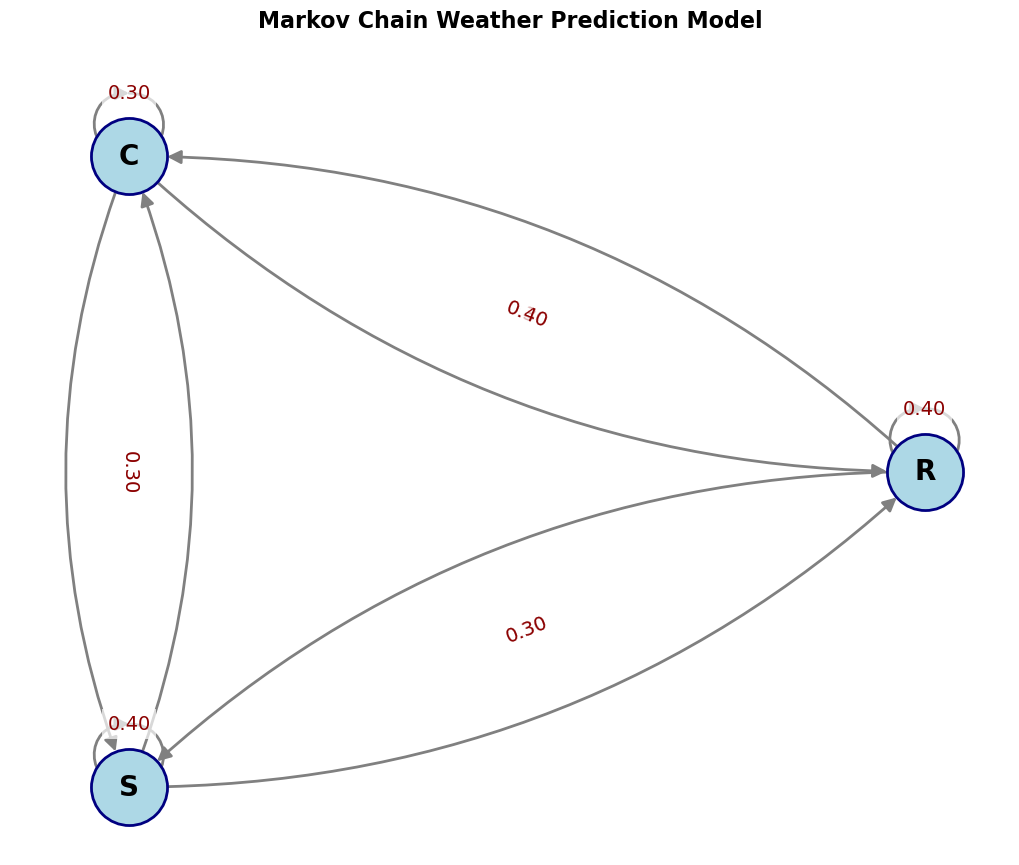

In [4]:
# Create a directed graph to represent the Markov Chain
G = nx.DiGraph()

# Define the states of the Markov Chain
states = ['R', 'C', 'S']  # R: Rainy, C: Cloudy, S: Sunny

# Add edges with transition probabilities between states
for i in range(3):  # Loop through each state
    for j in range(3):  # Loop through possible transitions
        if p[i][j] > 0:  # Only add edges with non-zero probabilities
            G.add_edge(states[i], states[j], weight=p[i][j])

# Customize the visualization of the graph
plt.figure(figsize=(10, 8))  # Set the figure size
pos = nx.circular_layout(G)  # Use a circular layout for better visibility

# Define options for drawing nodes
node_opts = {
    'node_color': 'lightblue',  # Set node color
    'node_size': 3000,         # Set node size
    'linewidths': 2,           # Set border width of nodes
    'edgecolors': 'navy',      # Set border color of nodes
    'font_size': 20,           # Set font size for labels
    'font_weight': 'bold'      # Set font weight for labels
}

# Define options for drawing edges
edge_opts = {
    'edge_color': 'gray',              # Set edge color
    'width': 2,                        # Set edge width
    'arrowsize': 20,                   # Set arrow size
    'arrowstyle': '-|>',               # Set arrow style
    'connectionstyle': 'arc3,rad=0.2'  # Add curvature to edges for better visibility
}

# Draw the graph with the specified node and edge options
nx.draw(G, pos, with_labels=True, **node_opts, **edge_opts)

# Add edge labels to display transition probabilities
labels = nx.get_edge_attributes(G, 'weight')  # Get edge weights
formatted_labels = {k: f'{v:.2f}' for k, v in labels.items()}  # Format weights to 2 decimal places
nx.draw_networkx_edge_labels(
    G, pos, 
    edge_labels=formatted_labels,  # Add formatted labels
    font_size=14,                  # Set font size for labels
    font_color='darkred',          # Set font color for labels
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)  # Add background to labels
)

# Add a title to the graph
plt.title("Markov Chain Weather Prediction Model", pad=20, size=16, fontweight='bold')

# Hide the axes for a cleaner visualization
plt.axis('off')

# Display the graph
plt.show()